In [1]:
import pandas, random
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import volcanoMaker

def sort_drop_dups(_df):
    _df.sort_index(by=['exp_reads'], ascending=False, inplace=True)
    _df.drop_duplicates(subset='gene_name', inplace=True)
    return _df

def compare_temp_changes_vs_abundance(v):
    ortiz_df = pandas.read_csv(
        '/opt/lib/ortiz/DESeq_genes_in_gonad.txt', sep='\t')
    
    df = v.df.copy()  #v.df[[(name in name_set) for name in v.df.gene_name]]
    
    df['OO RPKM'] = [v.name_to_oo_rpkm(name) for name in v.df.gene_name]
    df['OO RPKM'] = [np.log10(_x) for _x in df['OO RPKM'].tolist()]
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)   
    
    

    oo_df = pandas.read_csv(top_dir + 'combined_filtered/oo_both.txt', sep='\t')
    oo_df = sort_drop_dups(oo_df)
    
    i = df[[(name in set(i_names)) for name in df.gene_name]]
    ii = df[[(name in set(ii_names)) for name in df.gene_name]]
    iii = df[[(name in set(iii_names)) for name in df.gene_name]]

    def top_n(_df):
        _df = sort_drop_dups(_df.copy())
        return _df.head(100).copy()

    targs_xy_df = df[[(name in set(oo_df.gene_name)) for name in df.gene_name]]
    
    top_oo = top_n(oo_df)
    
    top_oo_df = df[[(name in set(top_oo.gene_name)) for name in df.gene_name]]

    oo_d = oo_df.to_dict('records')

    with sns.plotting_context('paper'):
        sns.set_style('ticks')
        mpl.rc("figure", figsize=(4, 4))
        fig, ax = plt.subplots(nrows=1)

        plt.scatter(df['OO RPKM'].tolist(), df['log2FoldChange'].tolist(), color='k', alpha=0.05)
        plt.scatter(iii['OO RPKM'].tolist(), iii['log2FoldChange'].tolist(), color='r',
                    edgecolor=None)
        ax.set_ylim([-2, 2])

        fig.savefig(top_dir + 'figs/gld1_block 25deg enrichment vs RNA abundance scatter.pdf',
                    bbox_inches='tight')
        plt.show()
        plt.clf()
        plt.close()
        
        
        fig, ax = plt.subplots(nrows=1)

        tups = []
        
#        for r in random.sample(df['OO RPKM'].tolist(), 5000):
        for r in df['OO RPKM']:
            tups.append(['Oogenic  transcriptome\n(Ortiz et al 2014)', r])
        for r in targs_xy_df['OO RPKM']:
            tups.append(['FBF targets\noogenic germlines (25°C)', r])
        for r in top_oo_df['OO RPKM']:
            tups.append(['Top 100 FBF targets\noogenic germlines (25°C)', r])             
        for r in i['OO RPKM']:
            tups.append(['Block I', r])
        for r in ii['OO RPKM']:
            tups.append(['Block II', r])
        for r in iii['OO RPKM']:
            tups.append(['Block III', r])

        violin = pandas.DataFrame(
            tups, columns=[' ', 'RNA abundance in Oo. GL (log10 RPKM)'])
        
        violin.dropna(inplace=True)

        sns.set_style('ticks')
        ax = sns.violinplot(
            y=' ',
            x='RNA abundance in Oo. GL (log10 RPKM)',
            data=violin,
            palette=sns.cubehelix_palette(start=1.25, rot=0.6, n_colors=2*len(set(violin[' ']))),
            ax=ax)
        # start=1.6304347826086956, rot=0.76
        sns.despine()

        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        #ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        fig.savefig(top_dir + 'figs/Figure S3.pdf',
                    bbox_inches='tight')
        plt.show()
        plt.clf()
        plt.close()        
        
def read_file(in_file, sheetname='', top_n=None):
    
    xls = pandas.ExcelFile(in_file)

table_dir = '/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/tables/'
top_dir = '/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/'

in_file = '/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/tables/File S6 Blocks.xlsx'



v = volcanoMaker.volcanoMaker()
v.gl_rnaseq()  # Sets v.ortiz (AKA v.gl_deseq_df).

v.read_clip_deseq_csv(table_dir + '6_reps_sp_vs_oo.txt')#lt_fbf1_and_2_vs_ht_fbf_deseq.txt')
v.read_programs()

#df = v.df[v.df['has_ortiz']].copy()
compare_temp_changes_vs_abundance(v)


#df['WBID'] = [try_to_find_wbid(x) for x in df['Gene name'].tolist()]

/Users/dfporter/pma/venv/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


From Nobel et al., loaded 6655 SP genes, 9415 OO genes, and 12839 total GL genes.
CLIP peaks in a GL program: Oogenic only                 4798
Oogenic and Spermatogenic    2462
Spermatogenic only           1825
                             1036
Name: Program, dtype: int64


AttributeError: 'DataFrame' object has no attribute 'gene_name'

/Users/dfporter/pma/venv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/dfporter/pma/venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dfporter/pma/venv/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


before drop na 10754
after drop na 10754


/Users/dfporter/pma/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


                             Dataset  RNA abundance (log10 RPKM) GL gender
0  Transcriptome\n(Ortiz et al 2014)                    1.850187        OO
1  Transcriptome\n(Ortiz et al 2014)                   -0.267052        OO
2  Transcriptome\n(Ortiz et al 2014)                    0.421067        OO
3  Transcriptome\n(Ortiz et al 2014)                    0.721454        OO
4  Transcriptome\n(Ortiz et al 2014)                    0.098498        OO


/Users/dfporter/pma/venv/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/dfporter/pma/venv/lib/python3.6/site-packages/seaborn/categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


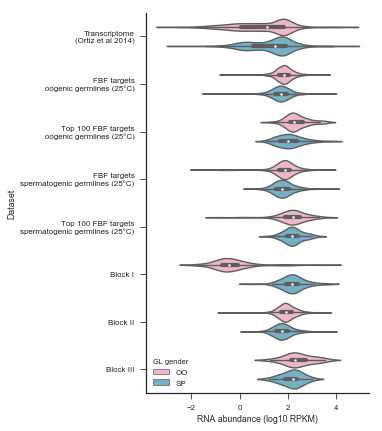

/Users/dfporter/pma/venv/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/dfporter/pma/venv/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


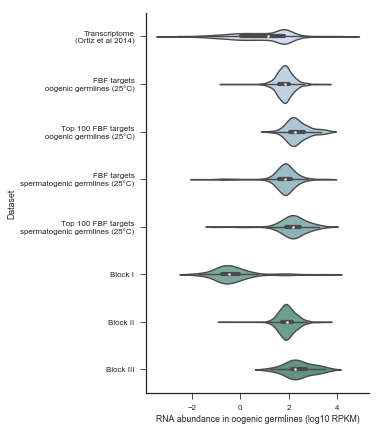

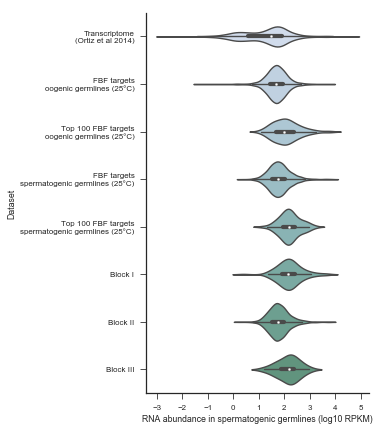

In [7]:
class Object(object):
    # Just used as a namespace.
    
    def __init__(self):
        pass
    
class violinMaker():
    
    def read_inputs(self):
        self.v = volcanoMaker.volcanoMaker()
        self.v.gl_rnaseq()  # Sets v.ortiz (AKA v.gl_deseq_df).
        self.read_ortiz()
        self.read_blocks()
        self.read_peaks()
    
    @staticmethod
    def sort_drop_dups(_df):
        _df.sort_index(by=['exp_reads'], ascending=False, inplace=True)
        _df.drop_duplicates(subset='gene_name', inplace=True)
        return _df
    
    def read_ortiz(self):
        ortiz_df = pandas.read_csv(
            '/opt/lib/ortiz/DESeq_genes_in_gonad.txt', sep='\t')
        
        df = self.v.gl_deseq_df.copy()  #v.df[[(name in name_set) for name in v.df.gene_name]]

        df['SP RPKM'] = df['Expression in fem-3 gonads (RPKM)']
        df['SP RPKM'] = [np.log10(_x) for _x in df['SP RPKM'].tolist()]
        df['OO RPKM'] = [np.log10(_x) for _x in df['Expression in  fog-2 gonads (RPKM)'].tolist()]
        
        print('before drop na', len(df.index))
        df = df.replace([np.inf, -np.inf], np.nan)

        #df.dropna(inplace=True)   
        print('after drop na', len(df.index))
        df['gene_name'] = df['Gene name']
        self.rnaseq_df = df.copy()

        return df
    
    def read_blocks(self):
        
        in_file = '/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/tables/File S6 Blocks.xlsx'
        
        self.blocks = Object()

        i_df = pandas.read_excel(in_file, sheetname='Block I', index=False)
        self.blocks.i_names = set(i_df['Gene name'].tolist())
        ii_df = pandas.read_excel(in_file, sheetname='Block II', index=False)
        self.blocks.ii_names = set(ii_df['Gene name'].tolist())
        iii_df = pandas.read_excel(in_file, sheetname='Block III', index=False)
        self.blocks.iii_names = set(iii_df['Gene name'].tolist())

    def read_peaks(self):
        
        self.peaks = Object()
        
        self.peaks.i = self.rnaseq_df[
            [(name in set(self.blocks.i_names)) for name in self.rnaseq_df.gene_name]]
        self.peaks.ii = self.rnaseq_df[
            [(name in set(self.blocks.ii_names)) for name in self.rnaseq_df.gene_name]]
        self.peaks.iii = self.rnaseq_df[
            [(name in set(self.blocks.iii_names)) for name in self.rnaseq_df.gene_name]]

        def top_n(_df):
            _df = self.sort_drop_dups(_df.copy())
            return _df.head(100).copy()
        
        oo_df = pandas.read_csv(top_dir + 'combined_filtered/oo_both.txt', sep='\t')
        self.peaks.oo_df = self.sort_drop_dups(oo_df)
        
        self.peaks.targs_oo_df = self.rnaseq_df[
            [(name in set(oo_df.gene_name)) for name in self.rnaseq_df.gene_name]]
        top_oo = top_n(oo_df)

        self.peaks.top_oo_df = self.rnaseq_df[
            [(name in set(top_oo.gene_name)) for name in self.rnaseq_df.gene_name]]

        sp_df = pandas.read_csv(top_dir + 'combined_filtered/sp_both.txt', sep='\t')
        self.peaks.sp_df = self.sort_drop_dups(sp_df)
        
        self.peaks.targs_sp_df = self.rnaseq_df[
            [(name in set(sp_df.gene_name)) for name in self.rnaseq_df.gene_name]]
        top_sp = top_n(sp_df)

        self.peaks.top_sp_df = self.rnaseq_df[
            [(name in set(top_sp.gene_name)) for name in self.rnaseq_df.gene_name]]

    def plot_scatter(self):
        with sns.plotting_context('paper'):
            sns.set_style('ticks')
            mpl.rc("figure", figsize=(4, 4))
            fig, ax = plt.subplots(nrows=1)

            plt.scatter(
                self.peaks.df['OO RPKM'].tolist(), 
                self.peaks.df['log2FoldChange'].tolist(), color='k', alpha=0.05)
            plt.scatter(
                self.peaks.iii['OO RPKM'].tolist(),
                self.peaks.iii['log2FoldChange'].tolist(), color='r',
                        edgecolor=None)

            ax.set_ylim([-2, 2])

            fig.savefig(top_dir + 'figs/enrichment vs RNA abundance scatter.pdf',
                        bbox_inches='tight')
            plt.show()
            plt.clf()
            plt.close()
        
    def plot_violin(self):
        with sns.plotting_context('paper'):
            sns.set_style('ticks')
            mpl.rc("figure", figsize=(4, 7))
            fig, ax = plt.subplots(nrows=1)

            tups = []

    #        for r in random.sample(df['OO RPKM'].tolist(), 5000):
            for x in ['OO', 'SP']:
                fullword = {'OO': 'Oogenic', 'SP': 'Spermatogenic'}[x]
                
                for r in self.rnaseq_df[x + ' RPKM']:
                    tups.append(['Transcriptome\n(Ortiz et al 2014)', r, x])
                
                for r in self.peaks.targs_oo_df[x + ' RPKM']:
                    tups.append(['FBF targets\noogenic germlines (25°C)', r, x])
                for r in self.peaks.top_oo_df[x + ' RPKM']:
                    tups.append(['Top 100 FBF targets\noogenic germlines (25°C)', r, x])   
                
                for r in self.peaks.targs_sp_df[x + ' RPKM']:
                    tups.append(['FBF targets\nspermatogenic germlines (25°C)', r, x])
                for r in self.peaks.top_sp_df[x + ' RPKM']:
                    tups.append(['Top 100 FBF targets\nspermatogenic germlines (25°C)', r, x]) 
                
                for r in self.peaks.i[x + ' RPKM']:
                    tups.append(['Block I', r, x])
                for r in self.peaks.ii[x + ' RPKM']:
                    tups.append(['Block II', r, x])
                for r in self.peaks.iii[x + ' RPKM']:
                    tups.append(['Block III', r, x])
            

            violin = pandas.DataFrame(
                tups, columns=['Dataset', 'RNA abundance (log10 RPKM)', 'GL gender'])
            print(violin.head())
            #violin.dropna(inplace=True)

            ax = sns.violinplot(
                y='Dataset',
                x='RNA abundance (log10 RPKM)',
                hue='GL gender',
                data=violin,
                palette=['#F9ADC5', '#66B7D5'],
                #palette=sns.cubehelix_palette(start=1.25, rot=0.6, n_colors=2*len(set(violin['Dataset']))),
                ax=ax)
            
            sns.despine()

            #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            #ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
            fig.savefig(top_dir + 'figs/Figure S4 one plot.pdf',
                        bbox_inches='tight')
            plt.show(); plt.clf(); plt.close() 
            
            fig, ax = plt.subplots(nrows=1)
            oo_violin = violin[violin['GL gender']=='OO'].copy()
            oo_violin['RNA abundance in oogenic germlines (log10 RPKM)'] = oo_violin['RNA abundance (log10 RPKM)']

            ax = sns.violinplot(
                y='Dataset',
                x='RNA abundance in oogenic germlines (log10 RPKM)',
#                hue='GL gender',
                data=oo_violin,
                #palette=['#F9ADC5', '#66B7D5'],
                palette=sns.cubehelix_palette(start=1.25, rot=0.6, n_colors=2*len(set(violin['Dataset']))),
                ax=ax)
            
            sns.despine()

            fig.savefig(top_dir + 'figs/Figure S4 Oogenic.pdf',
                        bbox_inches='tight')
            
            plt.show(); plt.clf(); plt.close() 
            
            fig, ax = plt.subplots(nrows=1)
            sp_violin = violin[violin['GL gender']=='SP'].copy()
            sp_violin['RNA abundance in spermatogenic germlines (log10 RPKM)'] = sp_violin['RNA abundance (log10 RPKM)']

            ax = sns.violinplot(
                y='Dataset',
                x='RNA abundance in spermatogenic germlines (log10 RPKM)',
#                hue='GL gender',
                data=sp_violin,
                #palette=['#F9ADC5', '#66B7D5'],
                palette=sns.cubehelix_palette(start=1.25, rot=0.6, n_colors=2*len(set(violin['Dataset']))),
                ax=ax)
            
            sns.despine()

            fig.savefig(top_dir + 'figs/Figure S4 Spermatogenic.pdf',
                        bbox_inches='tight')
            
            plt.show(); plt.clf(); plt.close() 
vm = violinMaker()
vm.read_inputs()
vm.plot_violin()

start=3.2857142857142856, rot=-0.65


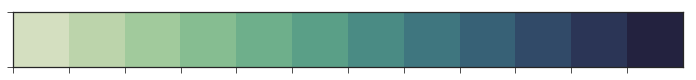

start=25.333333333333332, rot=-0.94


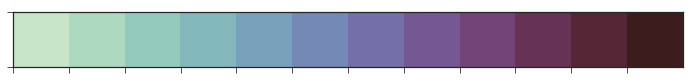

start=-4.125, rot=0.75


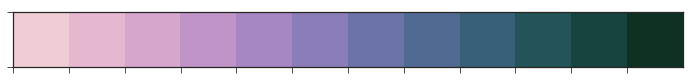

start=10.2, rot=-0.19


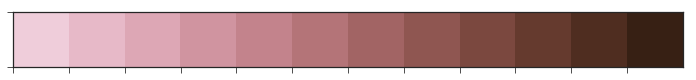

start=5.666666666666667, rot=-0.8


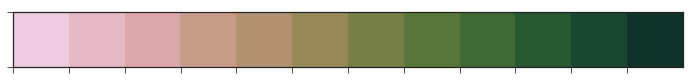

start=-1.0238095238095237, rot=0.26


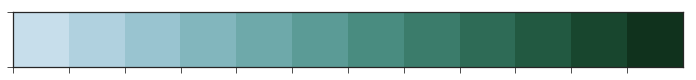

start=1.7777777777777777, rot=-0.35


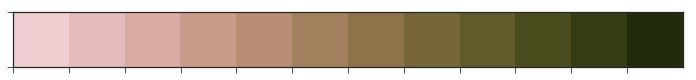

start=5.111111111111111, rot=-0.2


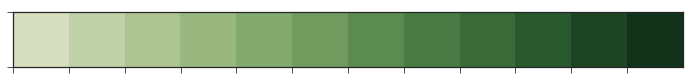

start=0.0, rot=0.01


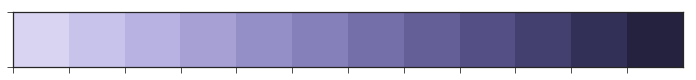

start=-2.9655172413793105, rot=0.37


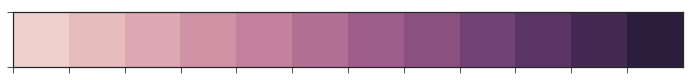

In [83]:
# Random color distributions to pick from.
for x in range(0, 10):
    
    signs = random.sample(set([-1, 1]), 2)
    start = signs[0] * random.randint(0, 100)/random.randint(1,50)
    rotate = signs[1] * random.randint(0, 100)/100
    
    print("start={0}, rot={1}".format(start, rotate))
    
    sns.palplot(sns.cubehelix_palette(n_colors=12, start=start, rot=rotate))
    plt.show()
    plt.clf() 
    

In [9]:
import numpy as np
arr = [(2, 9), (22, np.nan), (23, 'nan'), (np.nan, 3)]
arr = np.array(arr, dtype=float)
print(arr)
m = [not any(np.isnan(x)) for x in arr]
print(m)
m = arr[~np.isnan(arr).any(axis=1)]
print(m)

[[  2.   9.]
 [ 22.  nan]
 [ 23.  nan]
 [ nan   3.]]
[True, False, False, False]
[[ 2.  9.]]
